In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

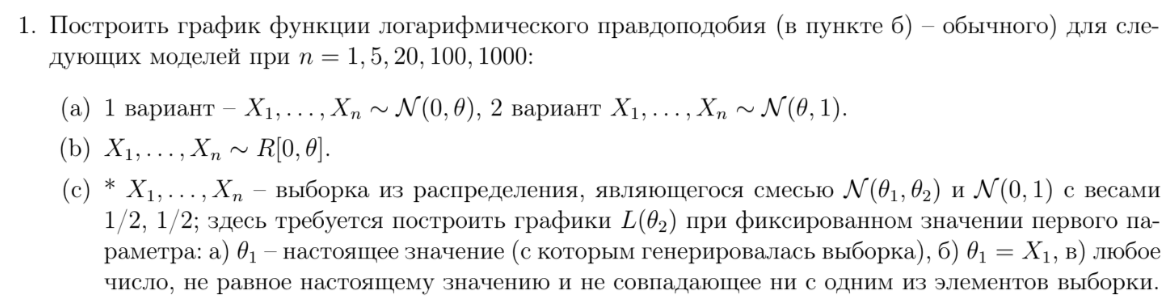

Значение параматра:  1


S^2 при 1 :  0.0
S^2 при 5 :  0.877773291293677
S^2 при 20 :  0.6491557504206883


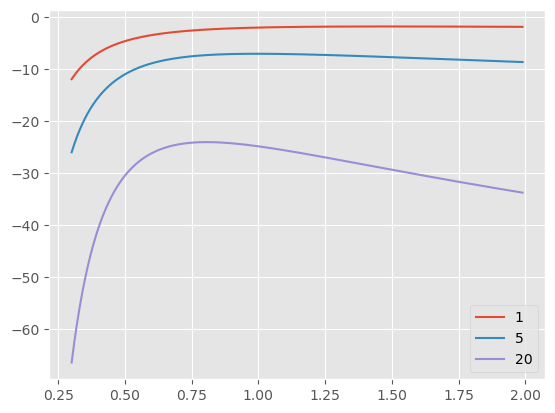

In [4]:
#a вар. 1
def likelihood(point, sample, n):
    ans = 0
    for i in range (n):
        ans += np.log(sc.stats.norm.pdf(sample[i], 0, point))
    return ans

N = [1, 5, 20]
t = float(input("Значение параматра: "))

for n in N:
    sample = sc.stats.norm.rvs(0, t, size=n)
    coor_t = np.arange(0.3, 2, 0.01)
    coor_y = [likelihood(point, sample, n) for point in coor_t]
    plt.plot(coor_t, coor_y, label=str(n))
    print("S^2 при", n, ": ", np.var(sample))
    
plt.legend(loc='best')

Значение параматра:  1


S^2 при 100 :  1.2009664047022965
S^2 при 1000 :  0.993678121043406


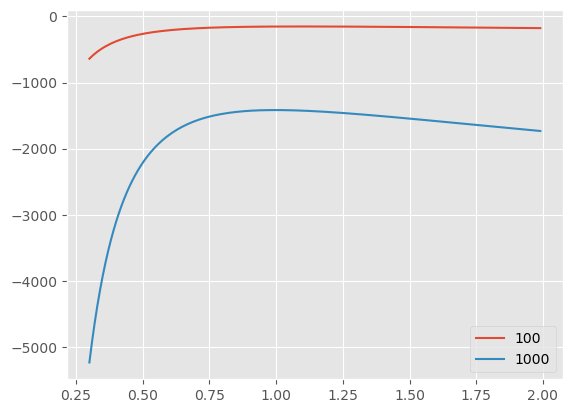

In [5]:
N = [100, 1000]
t = float(input("Значение параматра: "))

for n in N:
    sample = sc.stats.norm.rvs(0, t, size=n)
    coor_t = np.arange(0.3, 2, 0.01)
    coor_y = [likelihood(point, sample, n) for point in coor_t]
    plt.plot(coor_t, coor_y, label=str(n))
    print("S^2 при", n, ": ", np.var(sample))
    
plt.legend(loc='best')

Значение параматра:  1


X(n) при n = 1 :  0.3654433077912387
X(n) при n = 5 :  0.9315740200605734
X(n) при n = 20 :  0.9562426099749479
X(n) при n = 100 :  0.981089288799263
X(n) при n = 1000 :  0.9997141747058779


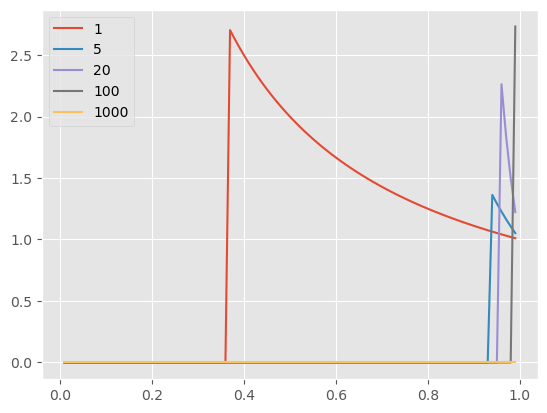

In [13]:
#b
def likelihood(point, sample, n):
    ans = 1
    for i in range (n):
        ans *= (sc.stats.uniform.pdf(sample[i], 0, point))
    return ans

N = [1, 5, 20, 100, 1000]
t = float(input("Значение параматра: "))

for n in N:
    sample = sc.stats.uniform.rvs(0, t, size=n)
    coor_t = np.arange(0.01, 1, 0.01)
    coor_y = [likelihood(point, sample, n) for point in coor_t]
    plt.plot(coor_t, coor_y, label=str(n))
    print("X(n) при n =", n, ": ", np.max(sample))
    
plt.legend(loc='best')

Размер выборки:  300
Значение первого параметра:  1
Значение второго параметра:  1


X1 = 0.34832850431677476 X(n) = 3.3887932194575723


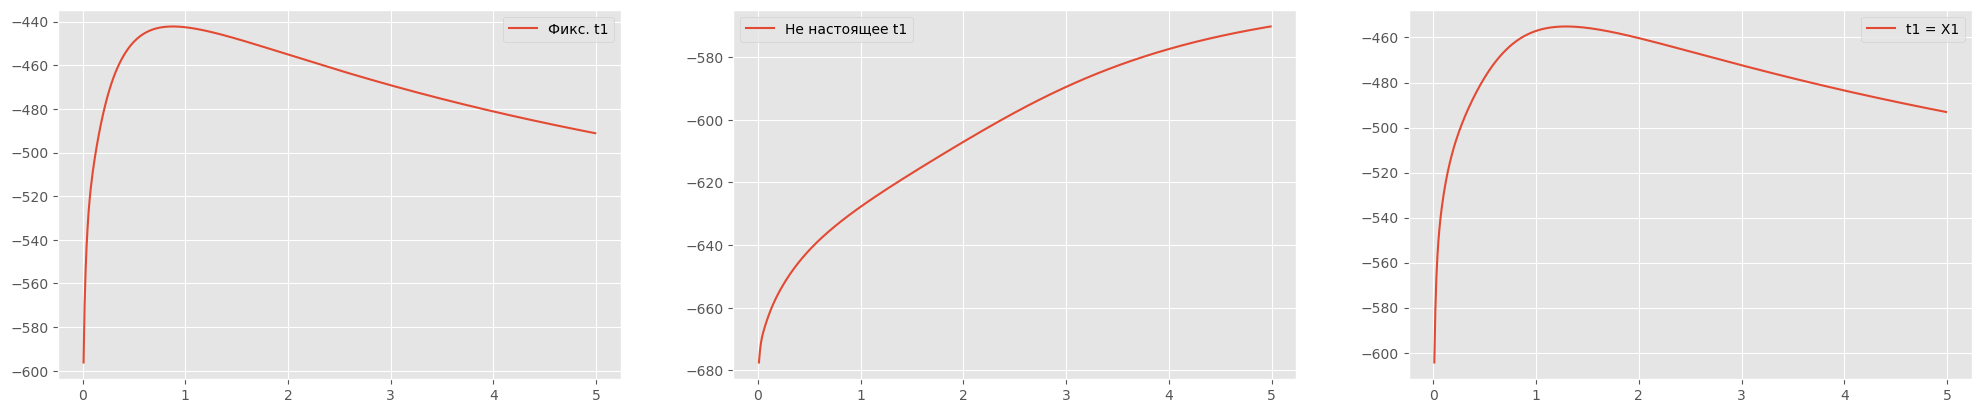

In [15]:
#c
def gen(t1, t2):
    b = np.random.binomial(1, 1/2)
    if b == 1:
        return sc.stats.norm.rvs(0, 1)
    else:
        return sc.stats.norm.rvs(t1, t2)

def likelihood(point, t1, sample, n):
    ans = 0
    for i in range (n):
        ans += np.log(1/2 *
        (sc.stats.norm.pdf(sample[i], t1, point**0.5) +
            sc.stats.norm.pdf(sample[i], 0, 1))) 
    return ans

plt.subplots_adjust(left=0.01, right=3)
n = int(input("Размер выборки: "))

t1 = float(input("Значение первого параметра: "))
t2 = float(input("Значение второго параметра: "))

sample = [gen(t1, t2) for i in range(n)]
print("X1 =", sample[0], "X(n) =", max(sample))

plt.subplot(1, 3, 1)
coor_t = np.arange(0.01, t2*5, 0.01)
coor_y = [likelihood(point, t1, sample, n) for point in coor_t]
plt.plot(coor_t, coor_y, label="Фикс. t1")
plt.legend(loc='best')

plt.subplot(1, 3, 2)
coor_y = [likelihood(point, min(sample)-0.324, sample, n) for point in coor_t]
plt.plot(coor_t, coor_y, label="Не настоящее t1")
plt.legend(loc='best')

plt.subplot(1, 3, 3)
coor_y = [likelihood(point, sample[0], sample, n) for point in coor_t]
plt.plot(coor_t, coor_y, label="t1 = X1")
plt.legend(loc='best')

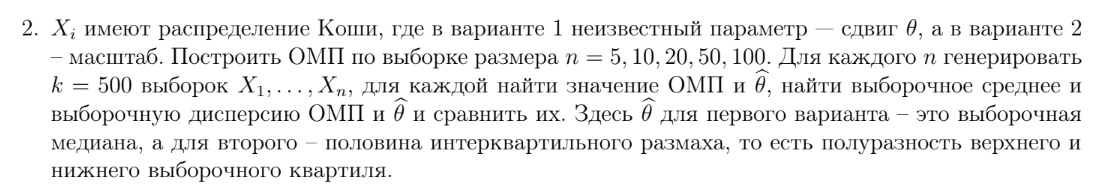

In [5]:
def log_likelihood_cauchy(t, sample, n):
    ans = 0
    for i in range(n):
        ans += np.log(sc.stats.cauchy.pdf(sample[i], loc=t))
    return ans

In [6]:
N = [5, 10, 20, 50, 100]
k = 500
t = float(input("Значение параметра: "))

for n in N:
    med = []
    mle = []
    for i in range(k):
        x = sc.stats.cauchy.rvs(loc=t, size=n)
        np.sort(x)
        med.append(np.median(x))
        tmp = sc.optimize.fmin(lambda y: -log_likelihood_cauchy(y, x, n), t, disp=False)
        mle.append(tmp)
        
    med = np.array(med)
    mle = np.array(mle)
    print("Для n =", n)
    print("Выборочные среднее MED:", np.mean(med))
    print("Выборочная дисперсия MED:", np.var(med))
    print("Выборочные среднее MLE:", np.mean(mle))
    print("Выборочная дисперсия MLE:", np.var(mle))
    print('----------')

Значение параметра:  1


Для n = 5
Выборочные среднее MED: 0.9819974327611963
Выборочная дисперсия MED: 1.2983353607318817
Выборочные среднее MLE: 0.9932070312500004
Выборочная дисперсия MLE: 0.8553449492111231
----------
Для n = 10
Выборочные среднее MED: 0.9652608706275296
Выборочная дисперсия MED: 0.3462270660920831
Выборочные среднее MLE: 0.9494796875000002
Выборочная дисперсия MLE: 0.28298210647979827
----------
Для n = 20
Выборочные среднее MED: 0.9907496859329858
Выборочная дисперсия MED: 0.12465411761039405
Выборочные среднее MLE: 1.0011880859375002
Выборочная дисперсия MLE: 0.11067032637065925
----------
Для n = 50
Выборочные среднее MED: 0.9932075146099741
Выборочная дисперсия MED: 0.0490249637125564
Выборочные среднее MLE: 1.0013384765625002
Выборочная дисперсия MLE: 0.04059302840770735
----------
Для n = 100
Выборочные среднее MED: 1.002759050611597
Выборочная дисперсия MED: 0.023508726232481396
Выборочные среднее MLE: 0.9995492187500001
Выборочная дисперсия MLE: 0.01924441441101081
----------


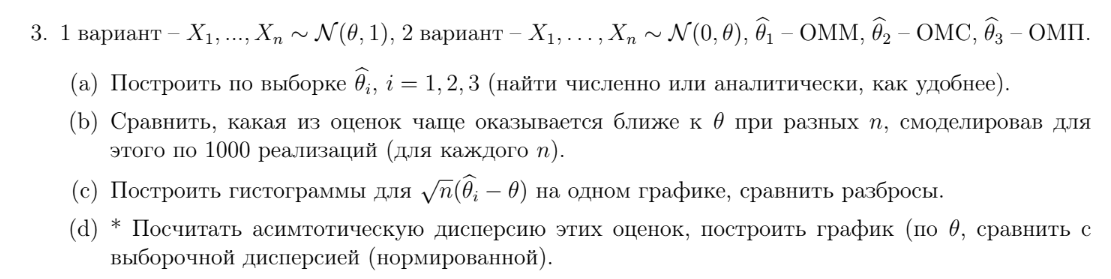

In [4]:
N = [10, 50, 100]
t = float(input("Значение параметра: "))

Значение параметра:  1


In [4]:
def spacing_func(t, x, n):
    ans = np.log(sc.stats.norm.cdf(x[0], t, 1))
    for i in range(1, n):
        ans += np.log(
            sc.stats.norm.cdf(x[i], t, 1) - sc.stats.norm.cdf(x[i-1], t, 1)
        )
    ans += np.log(1 - sc.stats.norm.cdf(x[n-1], t, 1))
    return ans

In [8]:
#a)
n = 30
x = sc.stats.norm.rvs(t, 1, size=n)
x = np.sort(x)

t1 = np.mean(x)
t2 = sc.optimize.fmin(lambda y: -spacing_func(y, x, n), t, disp=False)
t3 = np.mean(x)

print(t1, float(t2), t3)

1.05035169823133 1.0518554687500004 1.05035169823133


In [9]:
#b)
#Кол-во случаев, когда ОМС оказывалось ближе
for n in N:
    count = 0
    for i in range(1000):
        x = sc.stats.norm.rvs(t, 1, size=n)
        x = np.sort(x)
        t1 = np.mean(x)
        t2 = sc.optimize.fmin(lambda y: -spacing_func(y, x, n), t, disp=False)
        if abs(t1-t) > abs(t2-t):
            count += 1

    print("При n = ", n, "Доля, в которой ОМС ближе: ", count)
    

При n =  10 Доля, в которой ОМС ближе:  472
При n =  50 Доля, в которой ОМС ближе:  465
При n =  100 Доля, в которой ОМС ближе:  482


Значение параметра:  1


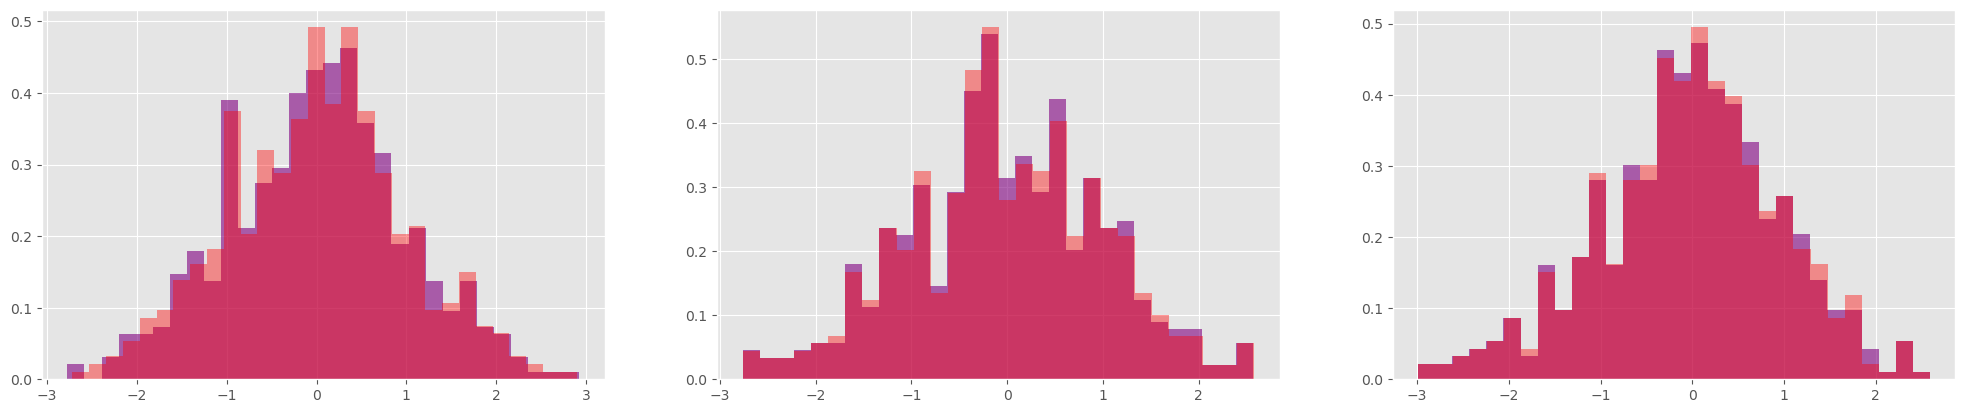

In [8]:
N = [10, 100, 1000]
t = float(input("Значение параметра: "))
plot_num = 1

plt.subplots_adjust(left=0.01, right=3)

for n in N:
    plt.subplot(1, 3, plot_num)
    plot_num += 1
    
    mle = []
    mse = []
    for i in range(500):
        x = sc.stats.norm.rvs(t, 1, size=n)
        x = np.sort(x)
        t1 = np.mean(x)
        t2 = sc.optimize.fmin(lambda y: -spacing_func(y, x, n), t, disp=False)
        mle.append(t1)
        mse.append(float(t2))

    mle = np.array(mle)
    mse = np.array(mse)

    mle -= t
    mse -= t

    mle *= (n**0.5)
    mse *= (n**0.5)

    plt.hist(mle, density=True, bins=30, color='purple', alpha=0.6, label='mle')
    plt.hist(mse, density=True, bins=30, color='red', alpha=0.4, label='mse')

In [ ]:
#d) асимптотические дисперсии ОМС и ОМП совпадают и равны 1


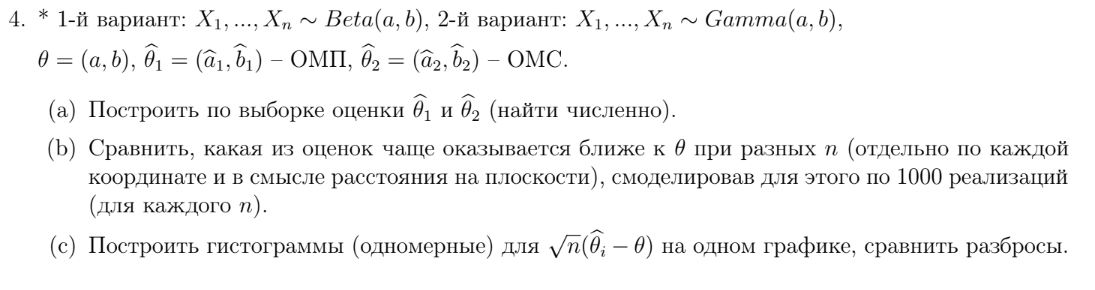

In [2]:
def beta_likelihood(params, sample):
    a = params[0]
    b = params[1]
    
    ans = 1
    for i in range(len(sample)):
        ans += np.log(
            sc.stats.beta.pdf(sample[i], a, b)
        )
    return ans

def beta_spacing(params, sample):
    a = params[0]
    b = params[1]
    
    ans = np.log(sc.stats.beta.cdf(sample[0], a, b))
    for i in range(1, n):
        ans += np.log(
            sc.stats.beta.cdf(sample[i], a, b) - sc.stats.beta.cdf(sample[i-1], a, b)
        )
    ans += np.log(1 - sc.stats.beta.cdf(sample[n-1], a, b))
    
    return ans

def beta_max(orig_params, sample, func):
    ans = sc.optimize.fmin(lambda params: -func(params, sample), orig_params, disp=False)
    return ans        

In [7]:
#a)
n = 100
a = float(input("Значение первого параметра: "))
b = float(input("Значение второго параметра: "))
sample = sc.stats.beta.rvs(a, b, size=n)
sample = np.sort(sample)

orig_params = [a, b]

t1 = beta_max(orig_params, sample, beta_likelihood)
t2 = beta_max(orig_params, sample, beta_spacing)

print(t1.tolist())
print(t2.tolist())

Значение первого параметра:  1
Значение второго параметра:  2


[1.0024695069068907, 2.272216581904468]
[0.9478682399486615, 2.123831133914177]


In [8]:
#b)
#Кол-во случаев, когда ОМС оказывалось ближе
a = float(input("Значение первого параметра: "))
b = float(input("Значение второго параметра: "))
orig_params = [a, b]
N = [10, 30, 50]

for n in N:
    count_a = 0
    count_b = 0
    count_norm = 0
    
    for i in range(1000):
        sample = sc.stats.beta.rvs(a, b, size=n)
        sample = np.sort(sample)
        t1 = beta_max(orig_params, sample, beta_likelihood)
        t2 = beta_max(orig_params, sample, beta_spacing)
        t1 = t1.tolist()
        t2 = t2.tolist()
        if abs(t1[0]-a) > abs(t2[0]-a):
            count_a += 1
        if abs(t1[1]-b) > abs(t2[1]-b):
            count_a += 1
        if (t1[0]-a)**2+(t1[1]-b)**2 > (t2[0]-a)**2+(t2[1]-b)**2:
            count_norm += 1

    print("При n = ", n, "Доля, в которой ОМС ближе (a, b, норма): ", count_a, count_b, count_norm)

Значение первого параметра:  1
Значение второго параметра:  2


При n =  10 Доля, в которой ОМС ближе (a, b, норма):  964 0 497
При n =  30 Доля, в которой ОМС ближе (a, b, норма):  961 0 499
При n =  50 Доля, в которой ОМС ближе (a, b, норма):  861 0 448


Значение параметра:  1
Значение параметра:  2


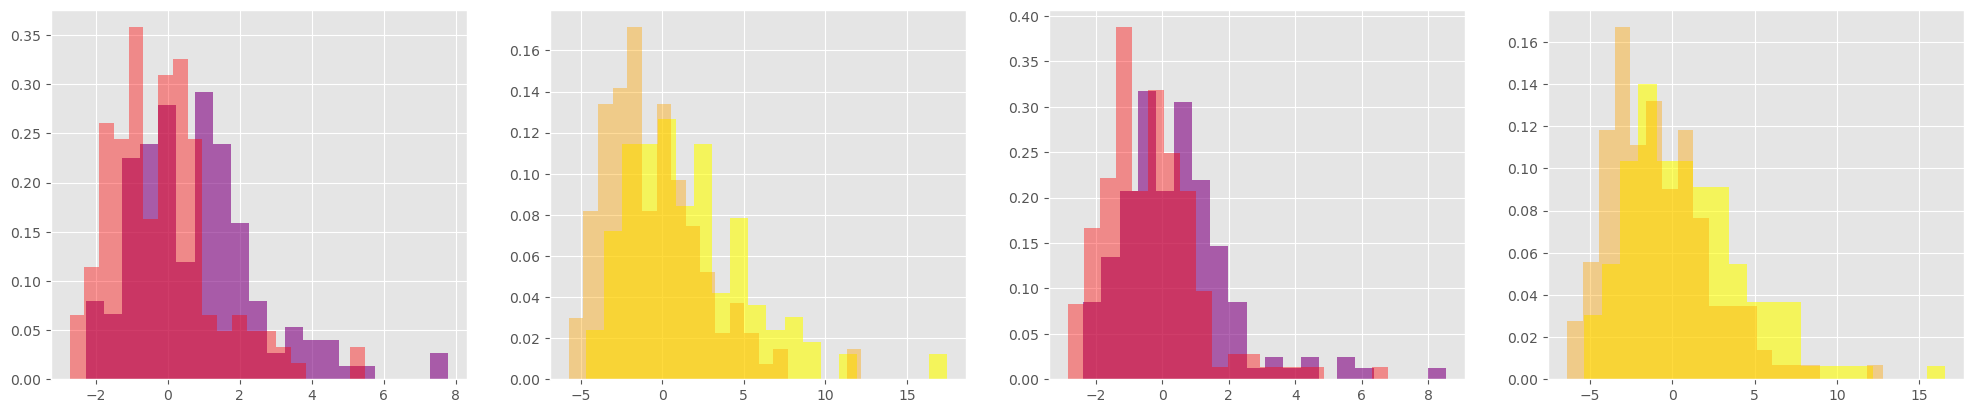

In [5]:
#c Гистограммы
N = [30, 50]
a = float(input("Значение параметра: "))
b = float(input("Значение параметра: "))
orig_params = [a, b]
plot_num = 1

plt.subplots_adjust(left=0.01, right=3)

for n in N:
    mle_a = []
    mle_b = []
    mse_a = []
    mse_b = []
    
    for i in range(150):
        sample = sc.stats.beta.rvs(a, b, size=n)
        sample = np.sort(sample)
        
        t1 = beta_max(orig_params, sample, beta_likelihood)
        t2 = beta_max(orig_params, sample, beta_spacing)
        t1 = t1.tolist()
        t2 = t2.tolist()
        
        mle_a.append(t1[0])
        mle_b.append(t1[1])
        mse_a.append(t2[0])
        mse_b.append(t2[1])
        
    mle_a = np.array(mle_a)
    mle_b = np.array(mle_b)
    mse_a = np.array(mse_a)
    mse_b = np.array(mse_b)

    mle_a -= a
    mse_a -= a
    mle_b -= b
    mse_b -= b

    mle_a *= (n**0.5)
    mse_a *= (n**0.5)
    mle_b *= (n**0.5)
    mse_b *= (n**0.5)
    
    plt.subplot(1, 4, plot_num)
    plt.hist(mle_a, density=True, bins=20, color='purple', alpha=0.6, label='mle')
    plt.hist(mse_a, density=True, bins=20, color='red', alpha=0.4, label='mse')
    plot_num += 1
    
    plt.subplot(1, 4, plot_num)
    plt.hist(mle_b, density=True, bins=20, color='yellow', alpha=0.6, label='mle')
    plt.hist(mse_b, density=True, bins=20, color='orange', alpha=0.4, label='mse')
    plot_num += 1